In [4]:
pip install opencv-python

# **Notion Image et Pixel**

Une image est une matrice de pixel.

Un pixel est un est un point, donc une image est un ensembles de pixels représentant une matrice 2.

# **I- Noir et blanc, niveaux de gris et couleur**

In [5]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import skimage.io as io
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np

In [6]:
#Lire l'image

nana1 = imread('nazuu.jpeg')
nana1

array([[[188, 172, 149],
        [188, 172, 149],
        [188, 172, 149],
        ...,
        [189, 176, 159],
        [189, 176, 159],
        [189, 176, 159]],

       [[188, 172, 149],
        [188, 172, 149],
        [188, 172, 149],
        ...,
        [189, 176, 159],
        [189, 176, 159],
        [189, 176, 159]],

       [[188, 172, 149],
        [188, 172, 149],
        [188, 172, 149],
        ...,
        [189, 176, 159],
        [189, 176, 159],
        [189, 176, 159]],

       ...,

       [[169, 144, 122],
        [170, 145, 123],
        [172, 147, 125],
        ...,
        [ 47,  45,  48],
        [ 45,  43,  46],
        [ 44,  42,  45]],

       [[173, 148, 126],
        [171, 146, 124],
        [170, 145, 123],
        ...,
        [ 49,  47,  50],
        [ 48,  46,  49],
        [ 42,  40,  43]],

       [[173, 148, 126],
        [171, 146, 124],
        [170, 145, 123],
        ...,
        [ 49,  47,  50],
        [ 48,  46,  49],
        [ 42,  40,  43]]

In [7]:
image_gray = imread('nazuu.jpeg', as_gray= True)

# Pareil pour convertir en nuances de gris rgb2gray
#imahe_g = rgb2gray(image_gray)

image_gray

array([[0.68134   , 0.68134   , 0.68134   , ..., 0.69622275, 0.69622275,
        0.69622275],
       [0.68134   , 0.68134   , 0.68134   , ..., 0.69622275, 0.69622275,
        0.69622275],
       [0.68134   , 0.68134   , 0.68134   , ..., 0.69622275, 0.69622275,
        0.69622275],
       ...,
       [0.57931882, 0.58324039, 0.59108353, ..., 0.17898549, 0.17114235,
        0.16722078],
       [0.5950051 , 0.58716196, 0.58324039, ..., 0.18682863, 0.18290706,
        0.15937765],
       [0.5950051 , 0.58716196, 0.58324039, ..., 0.18682863, 0.18290706,
        0.15937765]])

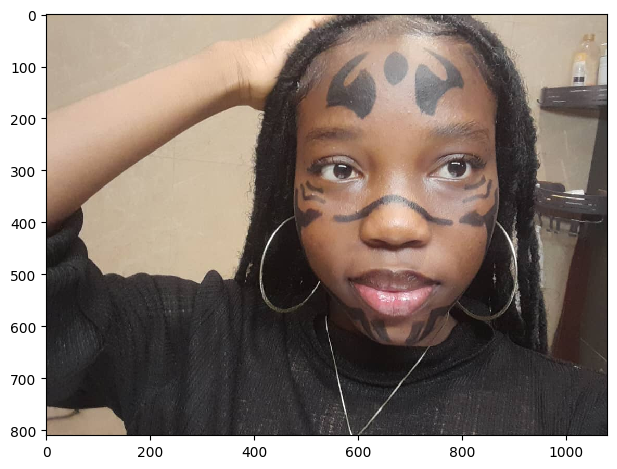

In [8]:
imshow(nana1)

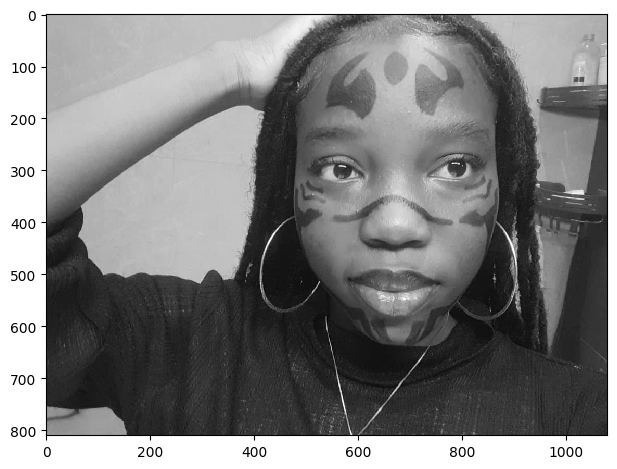

In [9]:
imshow(image_gray)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


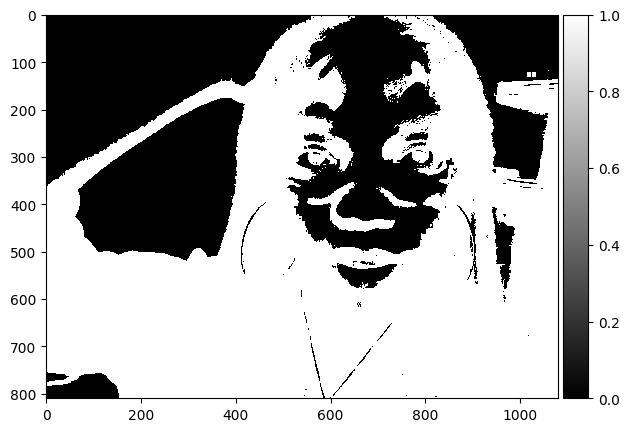

In [10]:
im = np.where(image_gray > 128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

# **II- Histogramme pour chaque timbre de couleur**

In [11]:
#Histogrammes avec scikit-image

def histo(image):
  _, axis = plt.subplots(ncols=2, figsize=(12, 3))

  if (image.ndim == 2):
    #Ca veut dire que ça peut être une image nuance de gris
    axis[0].imshow(image, cmap=plt.get_cmap('gray'))
    axis[0].set_title('Image en nuances de gris')
    axis[1].set_title('Histogramme')
    hist = exposure.histogram(image)
    axis[1].plot(hist[0])

  else:
    #Ca veut dire que ça peut être une image couleur
    axis[0].imshow(image)
    axis[0].set_title('Image couleur')
    axis[1].set_title('Histogramme')
    rgbcolors = ['red', 'green', 'blue']
    for i, color in enumerate(rgbcolors):
      axis[1].plot(exposure.histogram(image[...,i])[0], color=color)

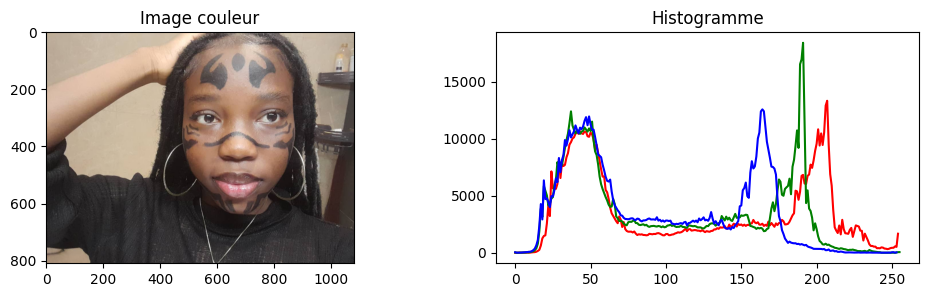

In [12]:
histo(nana1)

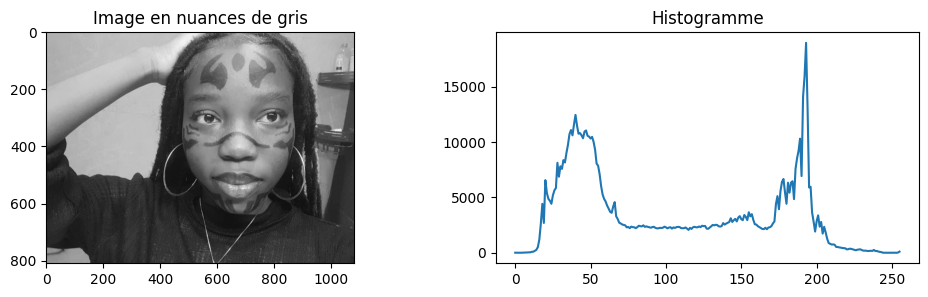

In [13]:
histo(image_gray)

# **III- Seuillage**

In [14]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

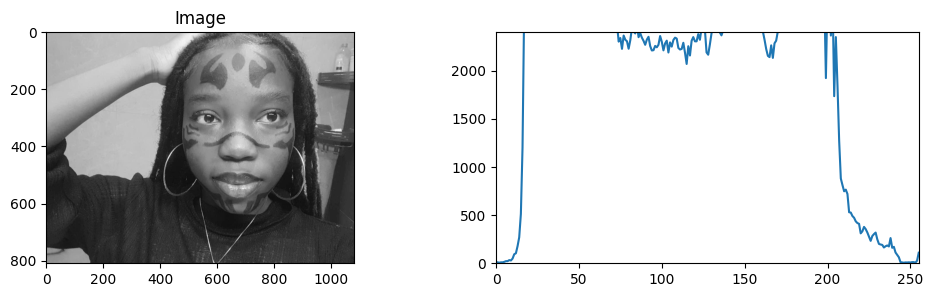

In [15]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])

histGrayScale(image_gray)

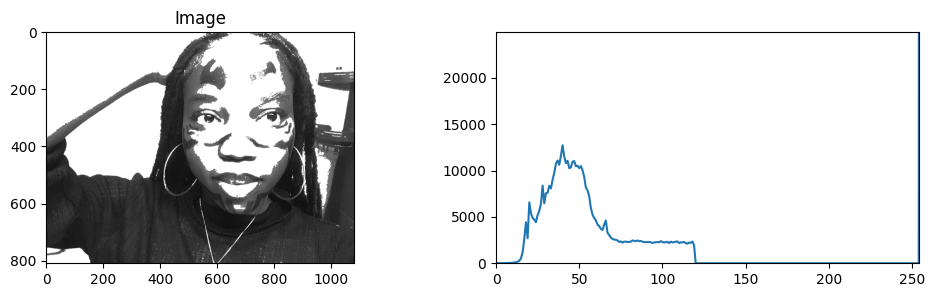

In [16]:
im1 = np.where(image_gray > 120/256, 1, image_gray)
histGrayScale(im1, 254, 24900)

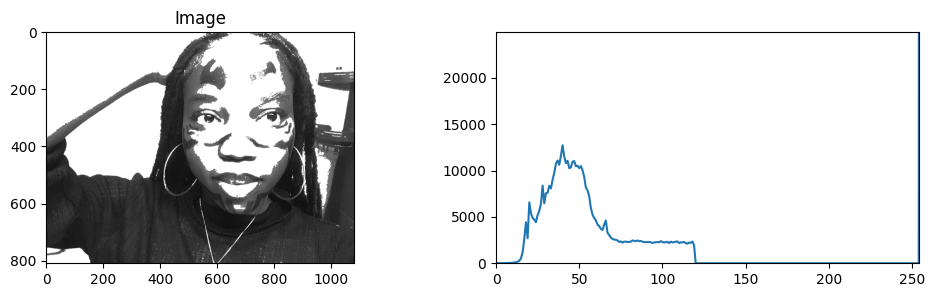

In [17]:
im2 = np.where(image_gray < 2/256, 0, im1)
histGrayScale(im1, 254, 24900)

# **Récupérer les statistiques globales de l'image**

In [18]:
def RGBStats(image):
    colors = []
    for i in range(0, 3):
        max_color =np.max(image[:,:,i])
        min_color =np.min(image[:,:,i])
        mean_color = np.mean(image[:,:,i])
        median_color = np.median(image[:,:,i])
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,
                        index = ['Red', ' Green', 'Blue'],
                        columns = ['Min', 'Max', 'Mean', 'Median'])

RGBStats(nana1)

,Min,Max,Mean,Median
Red,1,255,117.611139,110.0
Green,0,255,101.730488,84.0
Blue,0,253,91.851636,74.0


# **Seuillage binaire sur la moyenne**



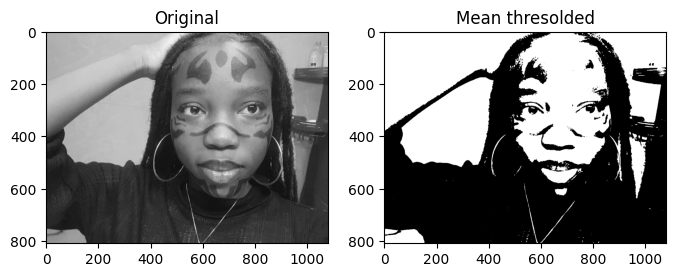

In [19]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')

thresholdMeanDisplay(image_gray)

# **Seuillage Otsu**

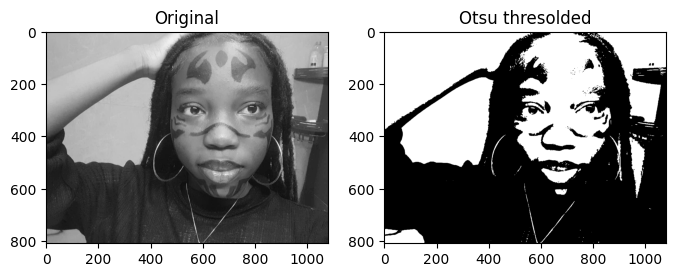

In [20]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')

thresholdOtsuDisplay(image_gray)

# **Seuillage des images en couleur**

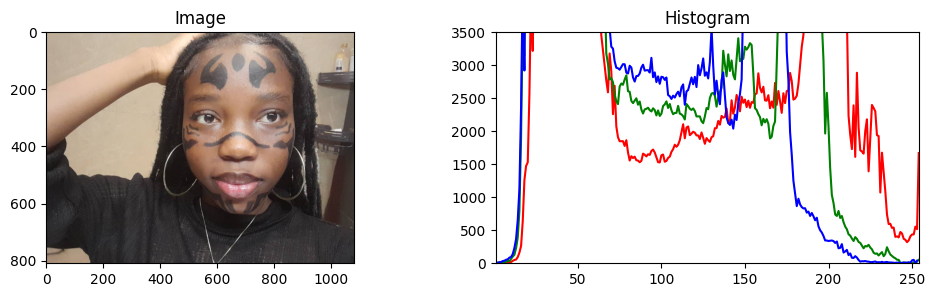

In [21]:

def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 3500])
histColor(nana1)

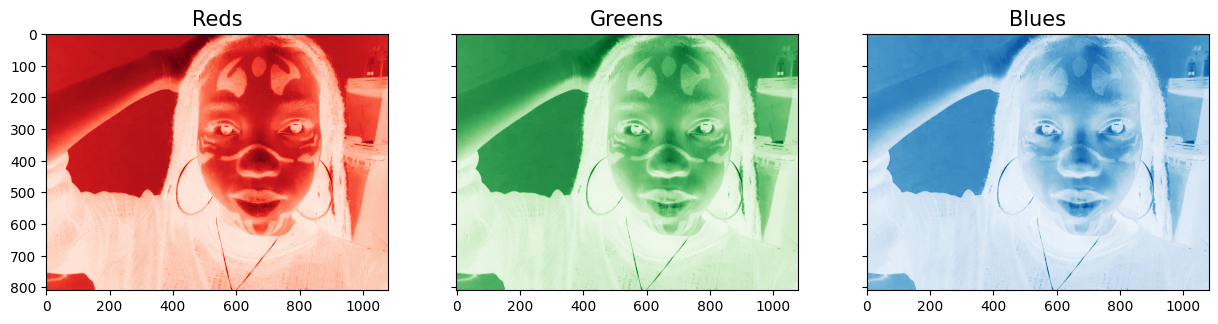

In [22]:
rgb = ['Reds','Greens','Blues']
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
   axes[i].imshow(nana1[:,:,i], cmap = rgb[i])
   axes[i].set_title(rgb[i], fontsize = 15)

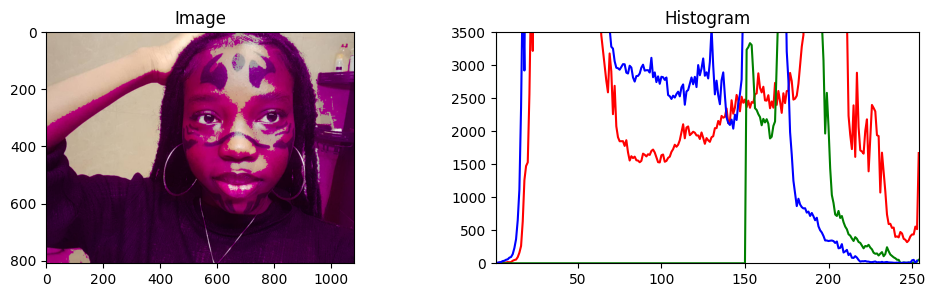

In [23]:
thresold_G = 150
image1_modified = nana1.copy()
image1_modified[:,:,1] = np.where(nana1[:,:,1]>thresold_G,
                                   nana1[:,:,1],
                                  0)
histColor(image1_modified)

#**Transformations**

In [24]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


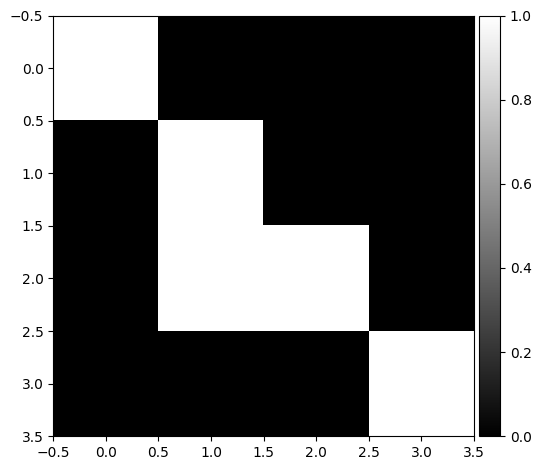

In [25]:
image_test = np.array([[1,0,0,0], [0,1,0,0], [0,1,1,0], [0,0,0,1]])
imshow(image_test, cmap=plt.get_cmap('gray'))

In [26]:
rotated = transform.rotate(image_test, angle=90, preserve_range=True)
print(rotated)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.2246468e-16 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


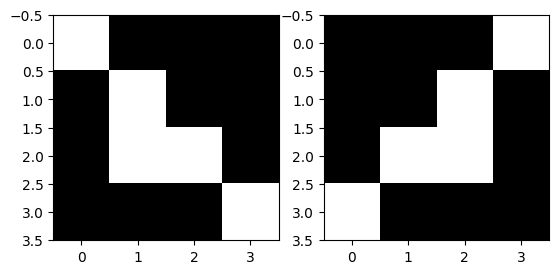

In [27]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(rotated, cmap=plt.get_cmap('gray'))

In [28]:
resized_img = transform.resize(image=image_test, output_shape=(6,6), preserve_range=True)

In [29]:
resized_img

array([[0.72222222, 0.5       , 0.13888889, 0.02777778, 0.        ,
        0.        ],
       [0.5       , 0.5       , 0.41666667, 0.08333333, 0.        ,
        0.        ],
       [0.16666667, 0.5       , 0.86111111, 0.30555556, 0.08333333,
        0.02777778],
       [0.16666667, 0.5       , 0.97222222, 0.86111111, 0.41666667,
        0.13888889],
       [0.08333333, 0.25      , 0.5       , 0.5       , 0.5       ,
        0.5       ],
       [0.02777778, 0.08333333, 0.16666667, 0.16666667, 0.5       ,
        0.72222222]])

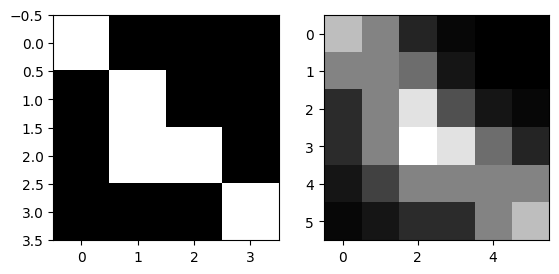

In [30]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(resized_img, cmap=plt.get_cmap('gray'))

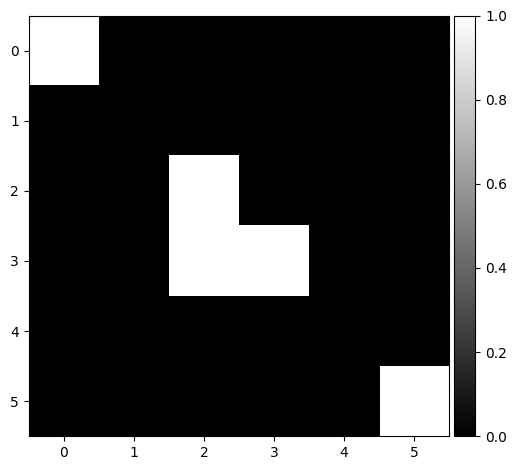

In [31]:
intresized = resized_img > 0.5
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))


#**Changement d'échelle**

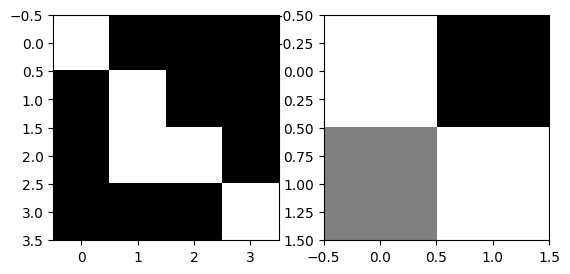

In [32]:
image_rescaled = transform.rescale(image=image_test, scale=1.0 / 2.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

#**Transformations euclidiennes**

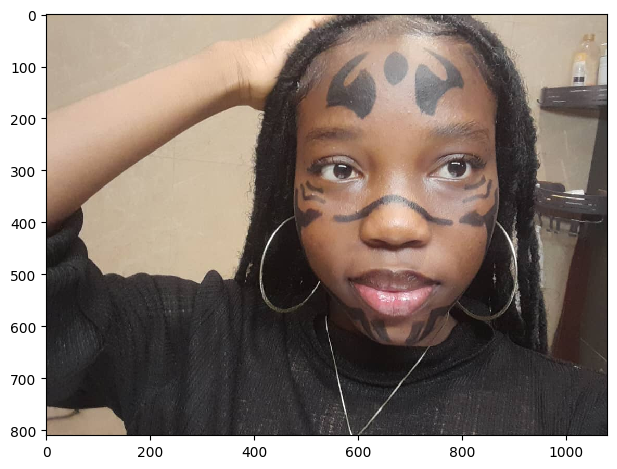

In [34]:
image = imread('nazuu.jpeg')
imshow(image)

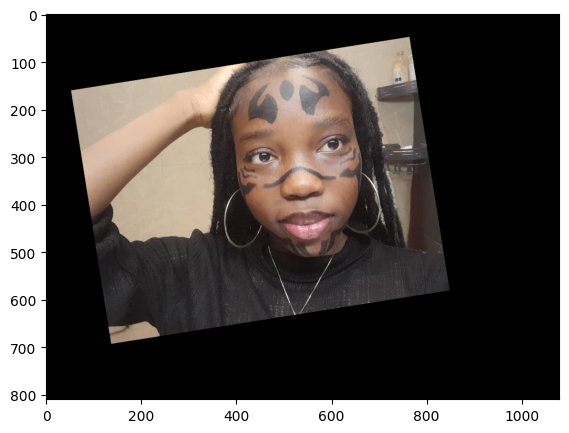

In [35]:

tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-40, -250))
plt.figure(figsize=(8, 5))
image_tr_1 = transform.warp(image, tr)
plt.imshow(image_tr_1)

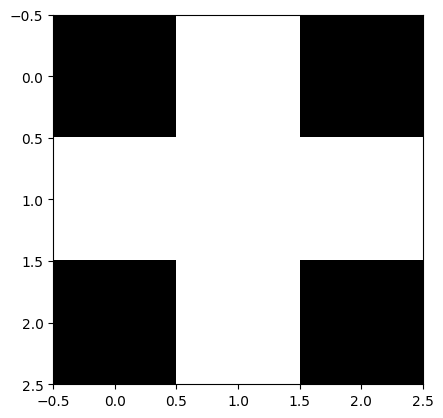

In [36]:
import numpy as np
from skimage import data
import matplotlib as plt
from skimage import morphology
from matplotlib.pyplot import imshow, get_cmap

imshow(morphology.disk(1), cmap=get_cmap('gray'))

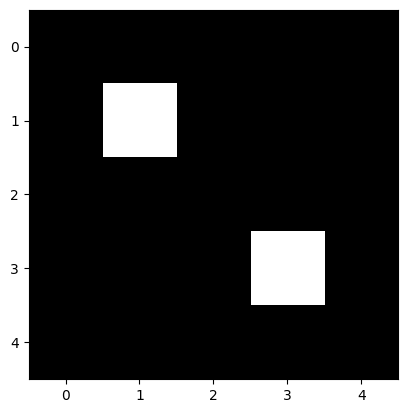

In [37]:
image_test = np.array([[0,0,0,0,0],
                       [0,1,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,1,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

#**Filtres de convolutions**

In [38]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt

In [39]:
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

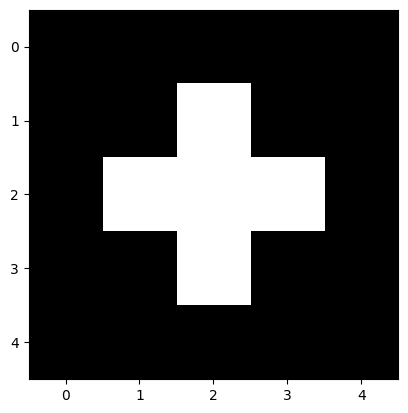

In [40]:
image_test = np.array([[0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,1,1,1,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

In [41]:
kernel = np.ones((3,3), np.float32)/2
kernel

array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5]], dtype=float32)

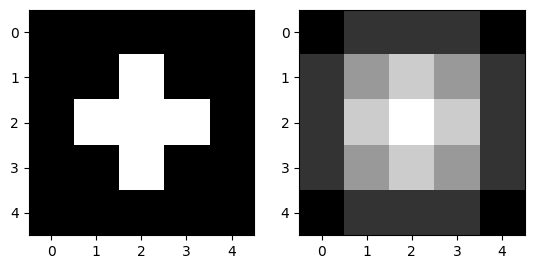

In [42]:
imgconvol = signal.convolve2d(image_test,
                              kernel,
                              mode='same',
                              boundary='fill',
                              fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

In [43]:
imgconvol

array([[0. , 0.5, 0.5, 0.5, 0. ],
       [0.5, 1.5, 2. , 1.5, 0.5],
       [0.5, 2. , 2.5, 2. , 0.5],
       [0.5, 1.5, 2. , 1.5, 0.5],
       [0. , 0.5, 0.5, 0.5, 0. ]])

In [44]:
kernel_contour = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])

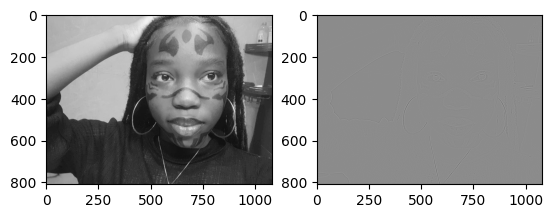

In [45]:
imgconvol = signal.convolve2d(image_gray,
                              kernel_contour,
                              boundary='symm',
                              mode='same')

displayTwoBaWImages(image_gray, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))



In [46]:
kernel_inccontrast = np.array([[0,0,0,0,0],
                               [0,0,-1,0,0],
                               [0,-1,5,-1,0],
                               [0,0,-1,0,0],
                               [0,0,0,0,0]])

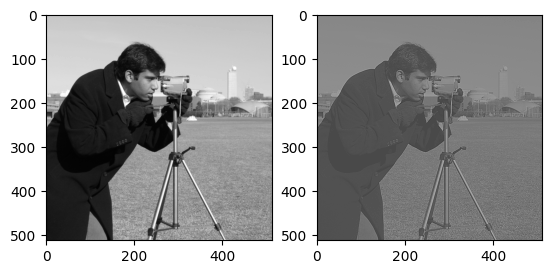

In [47]:
imgcontrast = signal.convolve2d(data.camera(),
                              kernel_inccontrast,
                              boundary='symm',
                              mode='same')
displayTwoBaWImages(data.camera(), imgcontrast)

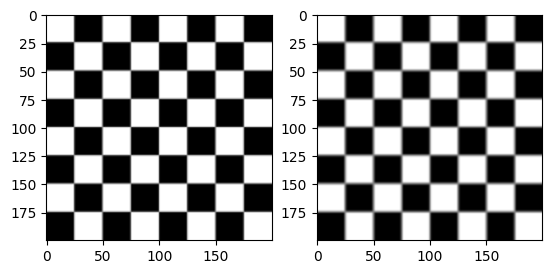

In [48]:
kernel = np.array([[0,0,0,0,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,0,0,0,0]])
img = signal.convolve2d(data.checkerboard(),
                        kernel,
                        boundary='symm',
                        mode='same')
displayTwoBaWImages(data.checkerboard(), img)

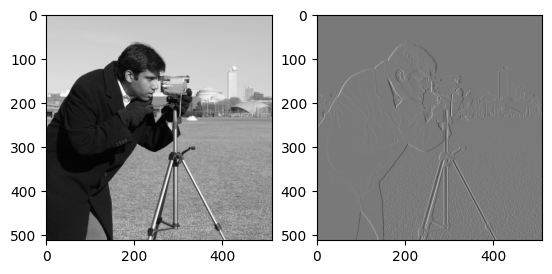

In [49]:
kernel = np.array([[0,0,0],
                   [-1,1,0,],
                   [0,0,0,]])
img = signal.convolve2d(data.camera(),
                        kernel,
                        boundary='symm',
                        mode='same')
displayTwoBaWImages(data.camera(), img)

In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [51]:
dataset_fashion_mnsit = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset_fashion_mnsit.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
pd.DataFrame(y_train)[0].value_counts()

,count
0,
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000


In [53]:
X_train = X_train / 255
X_test = X_test / 255
print(f"Données entrainement: {X_train.shape}, Test: {X_test.shape}")

Données entrainement: (60000, 28, 28), Test: (10000, 28, 28)


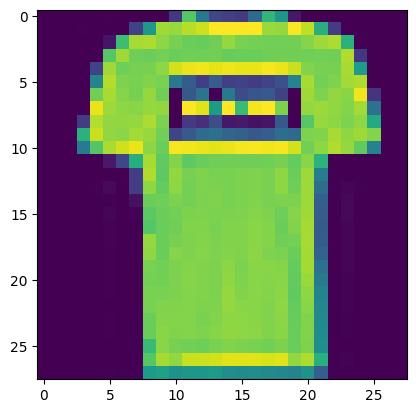

In [54]:
plt.imshow(X_train[1])

In [55]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [56]:
mon_cnn = tf.keras.Sequential()

# 3 couches de convolution, avec Nb filtres progressif 32, 64 puis 128
mon_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# remise à plat
mon_cnn.add(Flatten())

# Couche dense classique ANN
mon_cnn.add(Dense(512, activation='relu'))

# Couche de sortie (classes de 0 à 9)
mon_cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

mon_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mon_cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 163,850 (640.04 KB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mon_cnn.fit(x=X_train,
            y=y_train,
            validation_data=(X_test, y_test),
            epochs=25,
            callbacks=[early_stop])

Epoch 1/25
 473/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.5762 - loss: 1.1180

In [ ]:
losses = pd.DataFrame(mon_cnn.history.history)
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
losses[['loss', 'val_loss']].plot()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, pred),annot=True)